In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import graphs.my_graph as my_graph
import os, sys
sep = os.path.sep
from data_analysis.IO.hdf5 import load_dict_from_hdf5, save_dict_to_hdf5
from data_analysis.processing.signanalysis import gaussian_smoothing, smooth
from analysis.plots import show_samples_and_hist
Blue, Orange, Green, Red, Purple, Brown, Pink, Grey,\
    Kaki, Cyan = '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',\
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',\
    '#bcbd22', '#17becf'

In [136]:
Inh_data = load_dict_from_hdf5('data/Inh-Currents_Cell1_1_analyzed.h5')
Exc_data = load_dict_from_hdf5('data/Exc-Currents_Cell1_1_analyzed.h5')
# need to remove one weird huge VC event
i0 = np.argmax(Exc_data['mean_current_events'])
Exc_data['mean_current_events'][i0] = 0

In [137]:
from analysis.process import get_IPSC_in_down_states
Inh_data['IPSC_TIMES'] = get_IPSC_in_down_states(Inh_data)
save_dict_to_hdf5(Inh_data, 'data/Inh-Currents_Cell1_1_analyzed.h5')

In [68]:
for i in range(2, 5):
    Inh_data =  load_dict_from_hdf5('data/Inh-Currents_Cell'+str(i)+'_1_analyzed.h5')
    Inh_data['IPSC_TIMES'] = get_IPSC_in_down_states(Inh_data)
    save_dict_to_hdf5(Inh_data, 'data/Inh-Currents_Cell'+str(i)+'_1_analyzed.h5')


/Users/yzerlaut/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/yzerlaut/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/yzerlaut/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [112]:
Inh_data = load_dict_from_hdf5('data/Inh-Currents_Cell2_1_analyzed.h5')
print(len(Inh_data['IPSC_TIMES']))
t, WAVEFORMS = get_ISPC_waveform(Inh_data)    

528


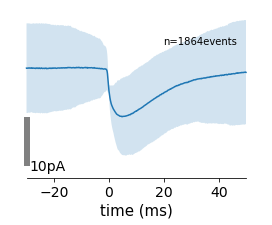

In [162]:
plot_ipsc_waveform(*get_ISPC_waveform(Inh_data));

In [3]:
from data_analysis.Up_and_Down_charact.classification_from_LFP import Mukovski_method, gaussian
Mukovski_method(Exc_data, min_duration=100e-3)
Mukovski_method(Inh_data, min_duration=100e-3)

In [7]:
#save_dict_to_hdf5(Inh_data, 'data/inh_analyzed.h5')
Inh_data = load_dict_from_hdf5('data/inh_analyzed.h5')

In [4]:
compute_baseline(Inh_data, current='Inh')
compute_baseline(Exc_data, current='Exc')
fig = plt.gcf()

NameError: name 'compute_baseline' is not defined

In [38]:
mean_currents_of_Upstates(Exc_data, current='Exc')
mean_currents_of_Upstates(Inh_data, current='Inh')

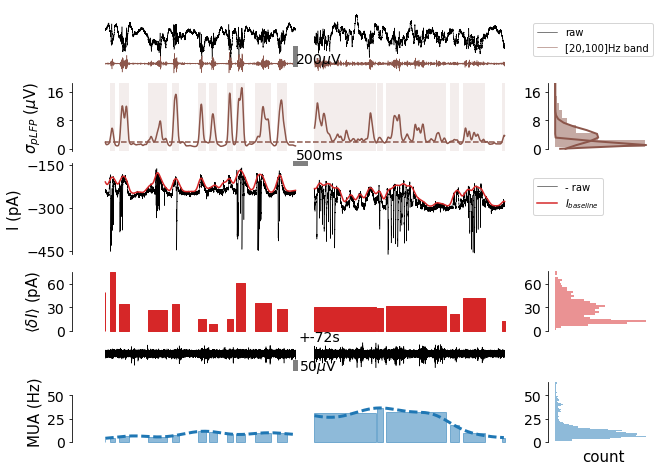

In [189]:
fig = show_samples_and_hist(Inh_data, current='Inh', t0=84, t1=12, xscale=500, twindow=10, xunit='ms')
fig.savefig('/Users/yzerlaut/Desktop/inh.svg')

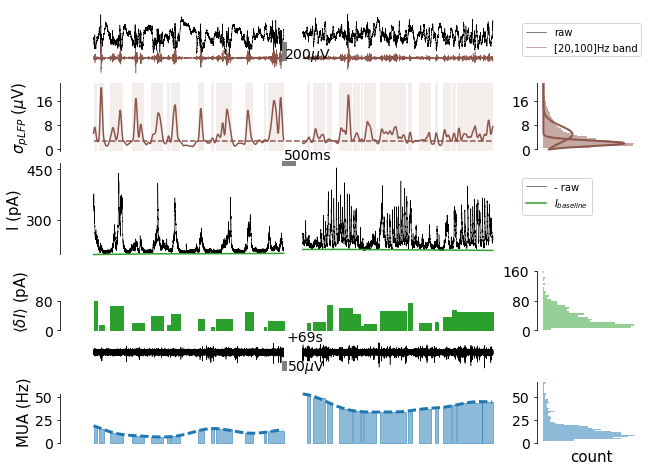

In [188]:
fig = show_samples_and_hist(Exc_data, current='Exc', t0=40, t1=109, xscale=500, twindow=10)
fig.savefig('/Users/yzerlaut/Desktop/exc.svg')

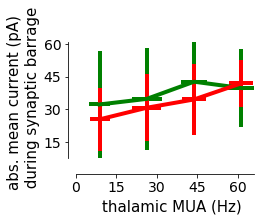

In [16]:

fig, ax = plt.subplots(figsize=(4,3))
#for data, current, col in zip([Exc_data], ['Exc'], ['g']):
for data, current, col, Vhold in zip([Exc_data, Inh_data], ['Exc', 'Inh'], ['g', 'r'], [-80., 30.]):
    rate_bins = np.linspace(0, 70, 5)
    thal_rate, deflect = data['thal_MUA_at_events'], data['mean_current_events']
    indices = np.digitize(thal_rate, bins=rate_bins)-1
    indices = indices[indices<len(rate_bins)-1]
    X, DX, Y, DY = [], [], [], []
    for i in np.unique(indices):
        cond = np.argwhere(indices==i).flatten()
        # X.append(thal_rate[cond].mean())
        X.append(.5*(rate_bins[i]+rate_bins[i+1]))
        DX.append(thal_rate[cond].std())
        Y.append(deflect[cond].mean())
        DY.append(deflect[cond].std())
    data['Y'] = np.abs(np.array(Y))

    # plt.plot(data['thal_MUA_at_events'], np.abs(data['mean_current_events']), 'o',
    #          color=col, alpha=.05)
    # ax.errorbar(X, np.abs(np.array(Y))-np.abs(np.array(Y))[0], yerr=DY, xerr=DX, color=col, lw=4)
    ax.errorbar(X, np.abs(np.array(Y)), yerr=DY, xerr=DX, color=col, lw=4)
    my_graph.set_plot(plt.gca(),
                      ylabel='abs. mean current (pA) \n during synaptic barrage',
                      xlabel='thalamic MUA (Hz)')
plt.tight_layout()    
plt.savefig('/Users/yzerlaut/Desktop/currents.svg')

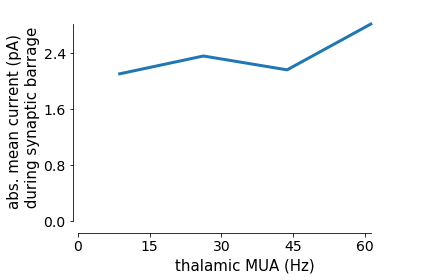

In [9]:
plt.plot(X, np.abs(Inh_data['Y']/Exc_data['Y']), lw=3)
plt.plot([0,0],[.1,1], 'w.')
my_graph.set_plot(plt.gca(), xlim=[0,70],
                  ylabel='abs. mean current (pA) \n during synaptic barrage',
                  xlabel='thalamic MUA (Hz)')
